In [120]:
from unidecode import unidecode
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Exploración y corrección de los conjuntos de datos

## Conjuntos de datos dados por el problema

### Accidentes de transito desde marzo 2017 a diciembre 2022

Descripción de la cantidad de accidentes en el municipio de Calarca desdel el año 2017.

In [4]:
accidentes = pd.read_csv('../data/ACCIDENTES_DE_TRANSITO_DESDE_MARZO__2017_A_DICIEMBRE_DE_2022_20251120.csv')
accidentes

,ORDEN,IPAT,FECHA,AÑO,MES,DIA,GRAVEDAD
0,1,A000057026,2017-03-16T00:00:00.000,2017,3,jueves,CON HERIDOS
1,2,A000057029,2017-03-14T00:00:00.000,2017,3,martes,CON HERIDOS
2,3,A000057030,2017-03-14T00:00:00.000,2017,3,martes,CON HERIDOS
3,4,A000057022,2017-03-14T00:00:00.000,2017,3,martes,SOLO DAÑOS
4,5,A000056976,2017-03-14T00:00:00.000,2017,3,martes,SOLO DAÑOS
...,...,...,...,...,...,...,...
1719,1720,A001460191,2022-12-19T00:00:00.000,2022,12,lunes,CON HERIDOS
1720,1721,A001460190,2022-12-19T00:00:00.000,2022,12,lunes,CON HERIDOS
1721,1722,A001460186,2022-12-19T00:00:00.000,2022,12,lunes,CON HERIDOS
1722,1723,A001460187,2022-12-19T00:00:00.000,2022,12,lunes,CON HERIDOS


In [5]:
# Modificaciones
accidentes = accidentes.rename(columns={'DIA': 'DIA_SEMANA'}) 

accidentes['FECHA'] = pd.to_datetime(accidentes['FECHA'])

accidentes['DIA'] = accidentes['FECHA'].dt.day
accidentes['DIA'] = accidentes['DIA'].astype(str).str.zfill(2)
accidentes['MES'] = accidentes['MES'].astype(str).str.zfill(2)

accidentes['FECHA'] = accidentes['FECHA'].dt.date.astype(str)
accidentes['FECHA'] = pd.to_datetime(accidentes['FECHA']).dt.strftime('%d/%m/%Y')

accidentes['DIA_SEMANA'] = accidentes['DIA_SEMANA'].str.upper()
accidentes['DIA_SEMANA'] = accidentes['DIA_SEMANA'].apply(lambda x: unidecode(x))

accidentes = accidentes[['ORDEN', 'IPAT', 'FECHA', 'DIA_SEMANA','DIA', 'MES', 'AÑO', 'GRAVEDAD']]


In [7]:
accidentes.head(3)

,ORDEN,IPAT,FECHA,DIA_SEMANA,DIA,MES,AÑO,GRAVEDAD
0,1,A000057026,16/03/2017,JUEVES,16,03,2017,CON HERIDOS
1,2,A000057029,14/03/2017,MARTES,14,03,2017,CON HERIDOS
2,3,A000057030,14/03/2017,MARTES,14,03,2017,CON HERIDOS


In [8]:
accidentes['AÑO'].value_counts().sort_index()

AÑO
2017    263
2018    418
2019    298
2020    228
2021    290
2022    227
Name: count, dtype: int64

### Sectores críticos de mortalidad 2022

Archivo geográfico de la red vial carretera nacional, con las principales vías nacionales de la red primaria y secundaria, que se encuentre particionada en diferentes elementos los cuales no deben superar una longitud máxima de 10 kilómetros.

In [10]:
sectores_criticos = pd.read_csv('../data/Sectores_críticos_mortalidad_2022_20251120.csv')
sectores_criticos.head(3)

,ActorVial,Prioridad,COD,CONCESION,CORREDOR,ENTIDAD,IDPROY,ID_MT,CodVia,CodPRi,CodPRf,CodSegPRi,CodSegPRf,PasoUrbano,Xi,Yi,Xf,Yf,Shape_Leng
0,Moto,1,"34,896",IP - Nueva Malla Vial del Valle del Cauca,Yumbo - Yotoco - Buga,ANI,"1,100",5G001,2301,11,12,230111,230112,1,-76.486357,3.579063,-76.485908,3.576157,330.437366113
1,Moto,2,"35,613",IP - Nueva Malla Vial del Valle del Cauca,Santander de Quilichao-Candelaria,ANI,5,5G001,2504A,35,36,2504A35,2504A36,1,-76.349779,3.415557,-76.351012,3.410509,587.579050898
2,Moto,3,"19,085",NaN,El Hatillo - Girardota - Copacabana - Bello - ...,DEPTO,"1,218",0,NaN,0,0,NaN,NaN,1,-75.525581,6.345254,-75.526520,6.345046,107.078456507


In [11]:
# Modificaciones
sectores_criticos = sectores_criticos[sectores_criticos['CORREDOR'].str.contains('calarcá', case=False, na=False)]
sectores_criticos.columns = sectores_criticos.columns.str.upper()
sectores_criticos = sectores_criticos.rename(columns={'ACTORVIAL': 'TIPO_VEHICULO'})
sectores_criticos = sectores_criticos.apply(lambda col: col.str.upper() if col.dtype == "object" else col)

sectores_criticos = sectores_criticos.assign(
    TIPO_VEHICULO = sectores_criticos['TIPO_VEHICULO'].replace('VEHICULO', 'AUTOMOVIL'),
    RURAL = 1 - sectores_criticos['PASOURBANO'],
    URBANO = sectores_criticos['PASOURBANO']
)

sectores_criticos = sectores_criticos.drop(columns=['PASOURBANO'])

Solo hay 4 sectores críticos que se incluyen a Calarcá como destino. 

In [12]:
sectores_criticos

,TIPO_VEHICULO,PRIORIDAD,COD,CONCESION,CORREDOR,ENTIDAD,IDPROY,ID_MT,CODVIA,CODPRI,CODPRF,CODSEGPRI,CODSEGPRF,XI,YI,XF,YF,SHAPE_LENG,RURAL,URBANO
41,MOTO,42,"31,208",ARMENIA -PEREIRA - MANIZALES,LA PAILA - CALARCÁ,ANI,62,1G010,4002,37,38,400237,400238,-75.792626,4.455951,-75.800047,4.452158,952.489973787,0,1
203,PEATON,54,"31,610",IP – GIC,CALARCÁ - IBAGUÉ,ANI,63,4G011,40TLC,5,6,40TLC5,40TLC6,-75.220274,4.424155,-75.211595,4.424079,993.3754268,1,0
353,TODOS,104,"31,533",IP – GIC,CALARCÁ - IBAGUÉ,ANI,63,4G011,4003,49,50,400349,400350,-75.433417,4.438846,-75.425256,4.441638,"1,006.00999989",0,1
593,AUTOMOVIL,47,"31,815",ARMENIA -PEREIRA - MANIZALES,LA PAILA - CALARCÁ,ANI,62,1G010,4002,5,6,40025,40026,-76.022035,4.353366,-76.030509,4.352049,991.598406076,1,0


### Vehículos matriculados desde enero de 2020 hasta mayo del 2022 por clase, modelo y tipo de vehículos

Vehículos matriculados en Calarca desde enero de 2020 hasta mayo del 2022 por clase, modelo y tipo de vehículo.

In [13]:
# Dataframe inicial
vehiculos_matriculados = pd.read_csv('../data/Vehículos_matriculados_desde_enero_de_2020_hasta_mayo_del_2022_por_clase,_modelo_y_tipo_de_vehículo_20251120.csv')
vehiculos_matriculados

,ORDEN,CLASE,MARCA,MODELO,FECHA MATRICULA/RADICACION,AÑO,MES,DIA
0,1,MOTOCICLETA,YAMAHA,2000,02/02/2000,2000,02.febrero,02.miércoles
1,2,MOTOCICLETA,SUZUKI,2000,23/02/2000,2000,02.febrero,23.miércoles
2,3,MOTOCICLETA,AUTECO KAWASAKI,2000,25/09/2000,2000,09.septiembre,25.lunes
3,4,AUTOMOVIL,RENAULT,1988,18/09/2000,2000,09.septiembre,18.lunes
4,5,CAMIONETA,CHEVROLET,1988,24/03/2000,2000,03.marzo,24.viernes
...,...,...,...,...,...,...,...,...
16938,16939,MOTOCICLETA,BAJAJ,2022,21/01/2022,2022,01.enero,21.viernes
16939,16940,MOTOCICLETA,VICTORY,2022,27/01/2022,2022,01.enero,27.jueves
16940,16941,MOTOCICLETA,BAJAJ,2022,25/01/2022,2022,01.enero,25.martes
16941,16942,MOTOCICLETA,BAJAJ,2022,28/01/2022,2022,01.enero,28.viernes


In [115]:
# Modificaciones
vehiculos_matriculados.columns = vehiculos_matriculados.columns.str.upper()

vehiculos_matriculados = vehiculos_matriculados.rename(columns={
    'CLASE': 'TIPO_VEHICULO',
    'FECHA MATRICULA/RADICACION': 'FECHA'
})

vehiculos_matriculados = vehiculos_matriculados[vehiculos_matriculados['MODELO'].astype(str).str.match(r'^(19|20)\d{2}$')]

vehiculos_matriculados['FECHA'] = pd.to_datetime(vehiculos_matriculados['FECHA'], dayfirst=True, errors='coerce')

vehiculos_matriculados['DIA'] = vehiculos_matriculados['FECHA'].dt.day.astype(str).str.zfill(2)
vehiculos_matriculados['MES'] = vehiculos_matriculados['FECHA'].dt.month.astype(str).str.zfill(2)
vehiculos_matriculados['AÑO'] = vehiculos_matriculados['FECHA'].dt.year

vehiculos_matriculados['DIA_SEMANA'] = (vehiculos_matriculados['FECHA'].dt.day_name(locale='es_ES').str.upper().apply(unidecode))

vehiculos_matriculados['FECHA'] = vehiculos_matriculados['FECHA'].dt.strftime('%d/%m/%Y')

vehiculos_matriculados = vehiculos_matriculados.apply(
    lambda col: col.str.upper() if col.dtype == "object" and col.name != "FECHA" else col
)

vehiculos_matriculados = vehiculos_matriculados[['ORDEN', 'TIPO_VEHICULO', 'MARCA', 'MODELO', 'FECHA', 'DIA_SEMANA', 'DIA', 'MES', 'AÑO']]


In [15]:
vehiculos_matriculados.head(3)

,ORDEN,CLASE,MARCA,MODELO,FECHA MATRICULA/RADICACION,AÑO,MES,DIA
0,1,MOTOCICLETA,YAMAHA,2000,02/02/2000,2000,02.febrero,02.miércoles
1,2,MOTOCICLETA,SUZUKI,2000,23/02/2000,2000,02.febrero,23.miércoles
2,3,MOTOCICLETA,AUTECO KAWASAKI,2000,25/09/2000,2000,09.septiembre,25.lunes


## Otros conjuntos de datos

### Vehículos involucrados en un accidente de transito ley 2251-2022

Registro Único Nacional de Tránsito (RUNT) publica anualmente un registro consolidado de los vehículos que estuvieron involucrados en siniestros de tránsito con resultado de muerte o lesión.

In [27]:
# Dataframe inicial
vehiculos_involucrados = pd.read_csv('../data/VEHICULOS_INVOLUCRADOS_EN_UN_ACCIDENTE_DE_TRANSITO_LEY_2251-2022_20251120.csv', low_memory=False)

In [28]:
vehiculos_involucrados.head(3)

,MARCA_VEHICULO,MODELO_VEHICULO,TIPO_VEHICULO,EDAD_VEHICULO,FECHA_ACCIDENTE,GRAVEDAD_ACCIDENTE,DEPARTAMENTO_ACCIDENTE,MUNICIPIO_ACCIDENTE,AUTORIDAD_DE_TRANSITO
0,VICTORY,2023,MOTOCICLETA,2,Dec 2024,CON HERIDOS,SANTANDER,BUCARAMANGA,DIR TTOyTTE BUCARAMANGA
1,KIA,2025,AUTOMOVIL,1,Dec 2024,CON HERIDOS,SANTANDER,BUCARAMANGA,DIR TTOyTTE BUCARAMANGA
2,FORD,2015,AUTOMOVIL,10,Dec 2024,CON HERIDOS,SANTANDER,BUCARAMANGA,DIR TTOyTTE BUCARAMANGA


In [29]:
# Modificaciones
vehiculos_involucrados = vehiculos_involucrados[vehiculos_involucrados['MUNICIPIO_ACCIDENTE'].str.contains('calarca', case=False, na=False)]

vehiculos_involucrados = vehiculos_involucrados.rename(columns={
    'MODELO_VEHICULO': 'MODELO',
    'MARCA_VEHICULO': 'MARCA',
    'FECHA_ACCIDENTE': 'FECHA',
    'GRAVEDAD_ACCIDENTE': 'GRAVEDAD'
})


vehiculos_involucrados = vehiculos_involucrados.drop(columns={'DEPARTAMENTO_ACCIDENTE', 'MUNICIPIO_ACCIDENTE'})

vehiculos_involucrados['EDAD_VEHICULO'] = vehiculos_involucrados['EDAD_VEHICULO'].astype(float).astype(int)
vehiculos_involucrados['EDAD_VEHICULO'] = vehiculos_involucrados['EDAD_VEHICULO'].astype(str).str.zfill(2)

vehiculos_involucrados['FECHA'] = pd.to_datetime(vehiculos_involucrados['FECHA'], format='%b %Y')
vehiculos_involucrados['FECHA'] = vehiculos_involucrados['FECHA'].dt.strftime('%m/%Y')

vehiculos_involucrados['MES'] = vehiculos_involucrados['FECHA'].str.split('/').str[0]
vehiculos_involucrados['AÑO'] = vehiculos_involucrados['FECHA'].str.split('/').str[1]
vehiculos_involucrados['DIA'] = '00'


vehiculos_involucrados = vehiculos_involucrados[['AUTORIDAD_DE_TRANSITO', 'TIPO_VEHICULO', 'MARCA', 'MODELO', 'EDAD_VEHICULO', 'GRAVEDAD','FECHA', 'DIA', 'MES', 'AÑO']]

In [30]:
# Dataframe final
vehiculos_involucrados.head(3)

,AUTORIDAD_DE_TRANSITO,TIPO_VEHICULO,MARCA,MODELO,EDAD_VEHICULO,GRAVEDAD,FECHA,DIA,MES,AÑO
2644,DIRECCION DE TTOYTTE POLICIA NACIONAL - DITRA,MICROBUS,HYUNDAI,2018,02,CON HERIDOS,12/2024,00,12,2024
2757,INSP TTOyTTE CALARCA,AUTOMOVIL,CHEVROLET,2019,06,CON HERIDOS,12/2024,00,12,2024
2758,INSP TTOyTTE CALARCA,CAMPERO,CHEVROLET,1999,26,CON HERIDOS,12/2024,00,12,2024


In [31]:
vehiculos_involucrados['AÑO'].value_counts().sort_index()

AÑO
2022    289
2023    258
2024    250
2025     71
Name: count, dtype: int64

### Lesiones accidentes de transito

Es toda acción donde una persona causa algún tipo de daño o lesión corporal a otra
mediante la participación de cualquier vehículo (accidente de tránsito), se mide en víctimas.

In [141]:
# Dataframe inicial
lesiones_accidentes = pd.read_csv('../data/LESIONES_ACCIDENTES_DE_TRÁNSITO_20251120.csv')
lesiones_accidentes.head(3)

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
0,01/01/2003,52,NARIÑO,52001,PASTO,1
1,01/01/2003,52,NARIÑO,52001,PASTO,1
2,01/01/2003,52,NARIÑO,52001,PASTO,1


In [142]:
# Modificaciones
lesiones_accidentes = lesiones_accidentes[lesiones_accidentes['MUNICIPIO'].str.contains('calarca', case=False, na=False)]

lesiones_accidentes = lesiones_accidentes.drop(columns={'COD_DEPTO', 'DEPARTAMENTO', 'COD_MUNI', 'MUNICIPIO'})

lesiones_accidentes = lesiones_accidentes.rename(columns={'FECHA HECHO': 'FECHA'})

lesiones_accidentes['DIA'] = lesiones_accidentes['FECHA'].str.split('/').str[0]
lesiones_accidentes['MES'] = lesiones_accidentes['FECHA'].str.split('/').str[1]
lesiones_accidentes['AÑO'] = lesiones_accidentes['FECHA'].str.split('/').str[2]

lesiones_accidentes['FECHA'] = pd.to_datetime(lesiones_accidentes['FECHA'], dayfirst=True)
lesiones_accidentes['DIA_SEMANA'] = lesiones_accidentes['FECHA'].dt.day_name(locale='es_ES').str.upper()
lesiones_accidentes['DIA_SEMANA'] = lesiones_accidentes['DIA_SEMANA'].apply(unidecode)

lesiones_accidentes = lesiones_accidentes[['CANTIDAD','FECHA', 'DIA', 'MES', 'AÑO', 'DIA_SEMANA']]

Se debe hacer una corrección de las fechas y su formato.

In [145]:
# dt = lesiones_accidentes[['FECHA']] # formato día-mes-año
# dt['FECHA'].str.split('/').str[0].unique(), dt['FECHA'].str.split('/').str[1].unique()

In [147]:
lesiones_accidentes['FECHA'] = pd.to_datetime(
    lesiones_accidentes['FECHA'],
    format="%d/%m/%Y"
)
lesiones_accidentes['FECHA'] = lesiones_accidentes['FECHA'].dt.strftime('%d/%m/%Y')

# lesiones_accidentes['FECHA'] = pd.to_datetime(lesiones_accidentes['FECHA'])
lesiones_accidentes.head(3)

,CANTIDAD,FECHA,DIA,MES,AÑO,DIA_SEMANA
279,1,06/01/2003,06,01,2003,LUNES
280,1,06/01/2003,06,01,2003,LUNES
4160,1,20/04/2003,20,04,2003,DOMINGO


In [148]:
# Dataframe final
lesiones_accidentes.head(3)

,CANTIDAD,FECHA,DIA,MES,AÑO,DIA_SEMANA
279,1,06/01/2003,06,01,2003,LUNES
280,1,06/01/2003,06,01,2003,LUNES
4160,1,20/04/2003,20,04,2003,DOMINGO


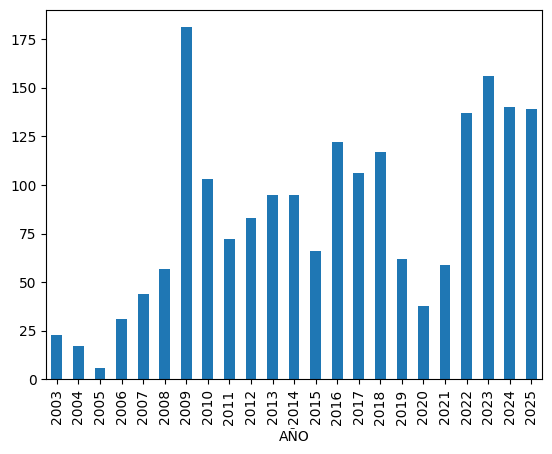

In [149]:
lesiones_accidentes['AÑO'].value_counts().sort_index().plot.bar()
plt.show()

### Homicidios accidente de tránsito Policía Nacional

En este conjunto de datos la ciudadanía puede encontrará información del delito de Homicidios en accidente de Tránsito desde el 01 de enero del año 2010 al 31 de mayo del año 2025.

In [134]:
homocidios_accidente = pd.read_csv('../data/Homicidios_accidente_de_tránsito_Policía_Nacional_20251120.csv')
homocidios_accidente.head(3)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,CAUCA,Cajibío,19130000,NO REPORTADO,13/02/2014,MASCULINO,NO REPORTADO,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
1,TOLIMA,Herveo,73347000,NO REPORTADO,24/09/2018,MASCULINO,NO REPORTADO,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
2,ANTIOQUIA,Bello,5088000,NO REPORTADO,28/05/2023,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


In [135]:
# Modificaciones
homocidios_accidente = homocidios_accidente[homocidios_accidente['MUNICIPIO'].str.contains('calarca', case=False, na=False)]

homocidios_accidente = homocidios_accidente.rename(columns={
    'ARMAS MEDIOS': 'TIPO_VEHICULO', 
    'FECHA HECHO': 'FECHA'
}) 

homocidios_accidente = homocidios_accidente.drop(columns={'DEPARTAMENTO', 'MUNICIPIO', 'CODIGO DANE', 'GRUPO ETARÍO', 'DESCRIPCIÓN CONDUCTA', 'CANTIDAD'})

homocidios_accidente = homocidios_accidente[~homocidios_accidente['TIPO_VEHICULO'].isin(['NO REPORTADO', 'SIN EMPLEO DE ARMAS'])]

homocidios_accidente = homocidios_accidente.assign(
    TIPO_VEHICULO = homocidios_accidente['TIPO_VEHICULO'].replace({
        'VEHICULO': 'AUTOMOVIL',
        'MOTO': 'MOTOCICLETA'
    })
)

homocidios_accidente['DIA'] = homocidios_accidente['FECHA'].str.split('/').str[0]
homocidios_accidente['MES'] = homocidios_accidente['FECHA'].str.split('/').str[1]
homocidios_accidente['AÑO'] = homocidios_accidente['FECHA'].str.split('/').str[2]

homocidios_accidente['FECHA'] = pd.to_datetime(homocidios_accidente['FECHA'], dayfirst=True)
homocidios_accidente['DIA_SEMANA'] = homocidios_accidente['FECHA'].dt.day_name(locale='es_ES').str.upper()
homocidios_accidente['DIA_SEMANA'] = homocidios_accidente['DIA_SEMANA'].apply(unidecode)

homocidios_accidente['FECHA'] = homocidios_accidente['FECHA'].dt.strftime('%d/%m/%Y')

homocidios_accidente = homocidios_accidente[['GENERO', 'TIPO_VEHICULO', 'FECHA', 'DIA_SEMANA', 'DIA', 'MES', 'AÑO']]

In [136]:
homocidios_accidente.head(3)

,GENERO,TIPO_VEHICULO,FECHA,DIA_SEMANA,DIA,MES,AÑO
14449,MASCULINO,BICICLETA,15/05/2016,DOMINGO,15,05,2016
14571,MASCULINO,BICICLETA,14/11/2018,MIERCOLES,14,11,2018
14799,MASCULINO,BICICLETA,20/08/2010,VIERNES,20,08,2010


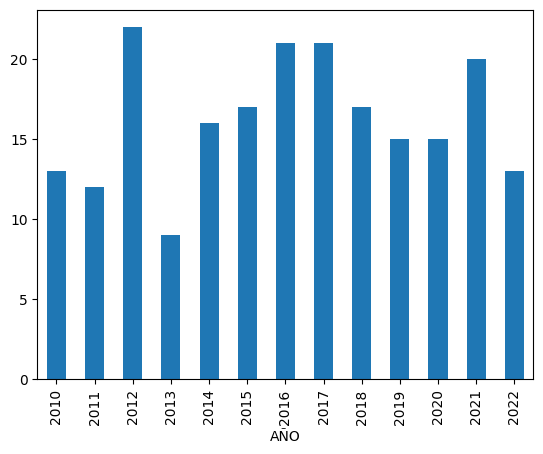

In [137]:
homocidios_accidente['AÑO'].value_counts().sort_index().plot.bar()
plt.show()

## Datos proveidos por la Alcaldia

**TODO: Revisar los duplicados luego de terminar la limpieza de los datos.**

### Accidentalidad 2022

Ignorar la Hoja2 y Hoja3 del documento, solo incluir la hoja que tiene por nombre 2022. 

In [312]:
accidentalidad_2022 = pd.read_excel("../data/alcaldia/ACCIDENTALIDAD-2022.xlsx", sheet_name="2022")
accidentalidad_2022.head(3)

,Solo daños,Herido,Muerto,Dirección,D.D,M.M,A.A,Choque,Atropello,Volcamiento,...,Masculino,Femenino,-18,18-30,31-60,60,Vehículo,Público,Particular,Oficial
0,NaN,1.0,NaN,Vía La Uribe-Calarcá km 84+860,3,1,2022,1.0,NaN,NaN,...,2.0,NaN,NaN,NaN,1.0,NaN,MOTOCICLETA-CAMIÓN,1.0,1,NaN
1,NaN,1.0,NaN,Vía La Uribe-Calarcá km 78+800,10,1,2022,NaN,1.0,NaN,...,2.0,NaN,NaN,NaN,1.0,1.0,BUS,1.0,NaN,NaN
2,NaN,1.0,NaN,Vía La Uribe-Calarcá km 68+100,12,1,2022,1.0,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,1.0,AUTOMÓVIL-AUTOMÓVIL,1.0,X,NaN


Se observa en la siguiente celda la gran cantidad de datos nulos en el conjunto de datos, sin embargo, esto es debido a que las columnas se llenan con 1 si aplica o se deja vacia. 

In [313]:
accidentalidad_2022.isna().sum()

Solo daños           166
Herido                60
Muerto               201
Dirección              2
D.D                    0
M.M                    0
A.A                    0
Choque                52
Atropello            184
Volcamiento          200
caída de ocupante    211
Otro                 209
Rural                128
Urbana                86
Masculino              9
Femenino             158
-18                  207
18-30                118
31-60                 60
60                   166
Vehículo               2
Público              154
Particular            22
Oficial              208
dtype: int64

In [314]:
nan_cols = list(set(accidentalidad_2022.columns) - set(['D.D', 'M.M', 'A.A', 'Dirección', 'Vehículo']))

for col in nan_cols:
    accidentalidad_2022[nan_cols] = accidentalidad_2022[nan_cols].fillna(0)

accidentalidad_2022.head(5)

,Solo daños,Herido,Muerto,Dirección,D.D,M.M,A.A,Choque,Atropello,Volcamiento,...,Masculino,Femenino,-18,18-30,31-60,60,Vehículo,Público,Particular,Oficial
0,0.0,1.0,0,Vía La Uribe-Calarcá km 84+860,3,1,2022,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,MOTOCICLETA-CAMIÓN,1.0,1,0.0
1,0.0,1.0,0,Vía La Uribe-Calarcá km 78+800,10,1,2022,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,BUS,1.0,0,0.0
2,0.0,1.0,0,Vía La Uribe-Calarcá km 68+100,12,1,2022,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,AUTOMÓVIL-AUTOMÓVIL,1.0,X,0.0
3,0.0,1.0,0,Av. Colón frente al # 21-175,12,1,2022,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,MOTOCICLETA-AUTOMÓVIL,0.0,2,0.0
4,0.0,1.0,0,Calle 39 #27-36,13,1,2022,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,MOTOCICLETA,0.0,1,0.0


In [315]:
accidentalidad_2022.isna().sum()

Solo daños           0
Herido               0
Muerto               0
Dirección            0
D.D                  0
M.M                  0
A.A                  0
Choque               0
Atropello            0
Volcamiento          0
caída de ocupante    0
Otro                 0
Rural                0
Urbana               0
Masculino            0
Femenino             0
-18                  0
18-30                0
31-60                0
60                   0
Vehículo             2
Público              0
Particular           0
Oficial              0
dtype: int64

Eliminar fila con valores nulos en la columna del tipo de vehículo.

In [345]:
accidentalidad_2022[accidentalidad_2022['Vehículo'].isna()]

,Solo daños,Herido,Muerto,Dirección,D.D,M.M,A.A,Choque,Atropello,Volcamiento,...,Masculino,Femenino,-18,18-30,31-60,60,Vehículo,Público,Particular,Oficial


In [346]:
accidentalidad_2022 = accidentalidad_2022.dropna(subset=['Vehículo'])

Buscar errores en datos de tipo string.

In [316]:
accidentalidad_2022['Muerto'].unique(), accidentalidad_2022['Vehículo'].unique(), accidentalidad_2022['Particular'].unique()

(array([0, ' ', 1], dtype=object),
 array(['MOTOCICLETA-CAMIÓN', 'BUS', 'AUTOMÓVIL-AUTOMÓVIL',
        'MOTOCICLETA-AUTOMÓVIL', 'MOTOCICLETA', 'CAMPERO-MOTOCICLETA',
        'BUS-CAMIÓN ', 'CAMPERO', 'AUTOMÓVIL-MOTOCICLETA', 'AUTOMÓVIL',
        'VOLQUETA-TRACTOCAMIÓN', 'MOTOCICLETA-BICICLETA', 'MOTOCICLETA ',
        nan, 'CAMIONETA-MOTOCICLETA', 'MOTOCICLETA-MOTOCICLETA',
        'BUSETA-AUTOMÓVIL', 'AUTOMÓVIL-CAMPERO', 'CAMIONETA-AUTOMÓVIL',
        'CAMIÓN-CAMIONETA', 'CAMION-AUTOMOVIL-MOTO', 'CAMIÓN ',
        'AUTOMÓVIL ', 'AUTOMÓVIL-CAMIONETA', 'VOLQUETA-Campero',
        'AUTOMÓVIL-TRACTOCAMIÓN', 'CAMIONETA', 'TRACTOCAMIÓN-TRACTOCAMIÓN',
        'AUTOMÓVIL-VOLQUETA', 'TRACTOCAMIÓN-MOTOCICLETA',
        'CAMIÓN-AUTOMÓVIL', 'CAMIONETA-CAMIONETA', 'CAMIÓN-MOTOCICLETA',
        'CAMIÓN-BICICLETA', 'MOTOCILCETA-PEATON ', 'BICICLETA-MOTOCICLETA',
        'BUS-AUTOMÓVIL', 'CAMIONETA-CAMPERO', 'MOTOCILCLETA',
        'MOTOCILCETA', 'CAMIONETA-CAMIÓN', 'MOTOCICLETA-MICROBUS',
        'B

Revisar filas con errores.

In [317]:
accidentalidad_2022[accidentalidad_2022['Muerto'] == ' ']

,Solo daños,Herido,Muerto,Dirección,D.D,M.M,A.A,Choque,Atropello,Volcamiento,...,Masculino,Femenino,-18,18-30,31-60,60,Vehículo,Público,Particular,Oficial
54,0.0,1.0,,Barrio Barsovia Mz B #1,11,4,2022,0.0,1.0,0.0,...,2.0,0.0,0.0,1.0,1.0,0.0,CAMIONETA-AUTOMÓVIL,0.0,2,0.0


In [318]:
accidentalidad_2022[accidentalidad_2022['Particular'] == 'X']

,Solo daños,Herido,Muerto,Dirección,D.D,M.M,A.A,Choque,Atropello,Volcamiento,...,Masculino,Femenino,-18,18-30,31-60,60,Vehículo,Público,Particular,Oficial
2,0.0,1.0,0,Vía La Uribe-Calarcá km 68+100,12,1,2022,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,AUTOMÓVIL-AUTOMÓVIL,1.0,X,0.0


In [319]:
accidentalidad_2022.loc[accidentalidad_2022['Particular'] == 'X', 'Particular'] = 0
accidentalidad_2022.loc[accidentalidad_2022['Muerto'] == ' ', 'Muerto'] = 0

In [320]:
accidentalidad_2022['Muerto'].unique(), accidentalidad_2022['Particular'].unique()

(array([0, 1], dtype=object), array([1, 0, 2, 3], dtype=object))

Cambiar tipo de dato de float32 a int32. 

In [321]:
to_int =list(set(accidentalidad_2022.columns)- (set(['Dirección ', 'Vehículo'])))
print(to_int)
for col in to_int:
    accidentalidad_2022[col] = accidentalidad_2022[col].astype(int)

accidentalidad_2022.dtypes

['Otro', 'Herido', 'Muerto', 'Público', 'Choque', 'Masculino', 'Rural', 'Oficial', 'caída de ocupante', 'Volcamiento', 'Particular', 'Solo daños', '31-60', '18-30', 'A.A', 'M.M', 'Urbana', -18, 'Femenino', 'Atropello', 'D.D', 60]


Solo daños            int32
Herido                int32
Muerto                int32
Dirección            object
D.D                   int32
M.M                   int32
A.A                   int32
Choque                int32
Atropello             int32
Volcamiento           int32
caída de ocupante     int32
Otro                  int32
Rural                 int32
Urbana                int32
Masculino             int32
Femenino              int32
-18                   int32
18-30                 int32
31-60                 int32
60                    int32
Vehículo             object
Público               int32
Particular            int32
Oficial               int32
dtype: object

Solucionar problemas con el tipo de Vehículo. Se prefiere dejar los vehiculos que fueron involucrados en el accidente y solucionar errores ortograficos. Hay un registro con 'nan', este se eliminará debido a que no se cuenta con información al respecto.

In [322]:
arr = list(map(lambda x: unidecode(str(x).strip().lower()).split('-'), list(accidentalidad_2022['Vehículo'].unique())))

flat = []
for x in arr:
    if isinstance(x, list):
        flat.extend(x)
    else:
        flat.append(x)

list(set(flat))

['buseta',
 'volqueta',
 'bus',
 'peaton',
 'camion',
 'motocilcleta',
 'tractocamion',
 'automovil',
 'bicicleta',
 'motocilceta',
 'microbus',
 'campero',
 'moto',
 'motocicleta',
 'camioneta',
 'nan']

Unificar nombres de vehiculos que significan lo mismo.

Estandarizar el formato de las direcciones y revisar cuantas de estas tienen la información de vía y "km".

### Accidentalidad 2021 y 2023

Última fila de los datos de accidentalidad del año 2021 son sumatorias sobre toda la columna, al igual que columna 1 fila 258 y columna 2 fila 257. Se eliminará esta última fila para evitar errores y se agregará 0 en las ubicaciones ya mencionadas.

En el conjunto de datos de accidentalidad del año 2023 se tienen registros que repiten las tablas.

In [306]:
accidentalidad_2021 = pd.read_excel('../data/alcaldia/Accidentalidad-2021-2023.xlsx', sheet_name='2021')
accidentalidad_2023 = pd.read_excel('../data/alcaldia/Accidentalidad-2021-2023.xlsx', sheet_name='2023')

accidentalidad_2021 = accidentalidad_2021[accidentalidad_2021.columns[:25]]

Corregir las columnas de los datos de accidentalidad del año 2021.

In [307]:
accidentalidad_2021.rename(columns={
    "Unnamed: 3": "Direccion",
    " ": "18-30", "30-60": "31-60",
    "Unnamed: 20": "Vehiculo",
    'D.D': 'Dia', 'M.M': 'Mes',
    'A.A': 'Año'
}, inplace=True)

accidentalidad_2021.columns = list(map(lambda x: unidecode(str(x).strip().capitalize()), accidentalidad_2021.columns))

In [308]:
accidentalidad_2021.columns

Index(['Solo danos', 'Herido', 'Muerto', 'Direccion', 'Dia', 'Mes', 'Ano',
       'Choque', 'Atropello', 'Volcamiento', 'Caida de ocupante', 'Otro',
       'Rural', 'Urbana', 'Masculino', 'Femenino', '-18', '18-30', '31-60',
       '60', 'Vehiculo', 'Publico', 'Particular', 'Oficial', 'Diplomatico'],
      dtype='object')

In [309]:
accidentalidad_2023.rename(columns={
    'Unnamed: 6': 'Año', 
    'D.D': 'Día', 
    'M.M': 'Mes'
}, inplace=True)

accidentalidad_2023.columns = list(map(lambda x: unidecode(str(x).strip().capitalize()), accidentalidad_2023.columns))

In [310]:
accidentalidad_2023.columns

Index(['Solo danos', 'Herido', 'Muerto', 'Direccion', 'Dia', 'Mes', 'Ano',
       'Choque', 'Atropello', 'Volcamiento', 'Caida de ocupante', 'Otro',
       'Rural', 'Urbana', 'Masculino', 'Femenino', '-18', '18-30', '31-60',
       '60', 'Vehiculo', 'Publico', 'Particular', 'Oficial', 'Diplomatico'],
      dtype='object')

Revisar valores nulos.

In [311]:
accidentalidad_2021.isna().sum()

Solo danos           143
Herido               129
Muerto               246
Direccion              1
Dia                    1
Mes                    1
Ano                    1
Choque                42
Atropello            242
Volcamiento          243
Caida de ocupante    259
Otro                 257
Rural                124
Urbana               137
Masculino             15
Femenino             207
-18                  254
18-30                141
31-60                 69
60                   210
Vehiculo               2
Publico              166
Particular            33
Oficial              259
Diplomatico          259
dtype: int64

In [284]:
accidentalidad_2023.isna().sum()

solo danos           137
herido                 9
muerto               138
direccion              0
dia                    0
mes                    0
ano                    0
choque                41
atropello            111
volcamiento          131
caida de ocupante    142
otro                 142
rural                107
urbana                66
masculino             13
femenino              95
-18                  139
18-30                 55
31-60                 47
60                   109
vehiculo               1
publico              115
particular            18
oficial              139
diplomatico          142
dtype: int64

Hacer corrección de tipo de datos.

In [285]:
accidentalidad_2021.dtypes

solo danos            object
herido               float64
muerto               float64
direccion             object
dia                  float64
mes                  float64
ano                  float64
choque                object
atropello             object
volcamiento           object
caida de ocupante     object
otro                  object
rural                 object
urbana                object
masculino            float64
femenino             float64
-18                  float64
18-30                 object
31-60                 object
60                    object
vehiculo              object
publico              float64
particular            object
oficial              float64
diplomatico           object
dtype: object

In [286]:
accidentalidad_2023.dtypes

solo danos            object
herido                object
muerto                object
direccion             object
dia                   object
mes                   object
ano                   object
choque                object
atropello             object
volcamiento           object
caida de ocupante     object
otro                  object
rural                 object
urbana                object
masculino             object
femenino              object
-18                  float64
18-30                 object
31-60                 object
60                   float64
vehiculo              object
publico               object
particular            object
oficial               object
diplomatico           object
dtype: object

### Accidentalidad 2024 y 2025

Los datos de la accidentalidad del año 2025 tienen una columna de mas al inicio y al final, por lo tanto, se debe eliminar estas. 

In [296]:
accidentalidad_2024 = pd.read_excel('../data/alcaldia/Accidentalidad-2024-2025.xlsx', sheet_name='2024')
accidentalidad_2025 = pd.read_excel('../data/alcaldia/Accidentalidad-2024-2025.xlsx', sheet_name='2025')

accidentalidad_2025 = accidentalidad_2025[accidentalidad_2025.columns[1:-1]]

In [303]:
accidentalidad_2024.rename(columns={
    'A.A': 'Año',
    'D.D': 'Dia',
    'M.M': 'Mes',
}, inplace=True)

accidentalidad_2024.columns = list(map(lambda x: str(x).strip().capitalize(), accidentalidad_2024.columns))

accidentalidad_2024.columns

Index(['Solo daños', 'Herido', 'Muerto', 'Dirección', 'Dia', 'Mes', 'Año',
       'Choque', 'Atropello', 'Volcamiento', 'Caída de ocupante', 'Otro',
       'Rural', 'Urbana', 'Masculino', 'Femenino', '-18', '18-30', '31-60',
       '60', 'Vehículo', 'Público', 'Particular', 'Oficial', 'Diplomático',
       'Conductor', 'Acompañante', 'Peatón', 'Pasajero'],
      dtype='object')

In [305]:
accidentalidad_2025.rename(columns={
    'A.A': 'Año',
    'D.D': 'Dia',
    'M.M': 'Mes',
}, inplace=True)

accidentalidad_2025.columns = list(map(lambda x: str(x).strip().capitalize(), accidentalidad_2025.columns))

accidentalidad_2025.columns

Index(['Solo daños', 'Herido', 'Total heridos', 'Muerto', 'Total muertos',
       'Direccion', 'Dia', 'Mes', 'Año', 'Choque', 'Atropello', 'Volcamiento',
       'Caida del ocupante', 'Incendio', 'Otro', 'Rural', 'Nacional',
       'Departamental', 'Municipal', 'Urbana', 'Masculino', 'Femenino', '-18',
       '18-30', '31-60', '60', 'Vehiculos', 'Publico', 'Particular', 'Oficial',
       'Diplomatico'],
      dtype='object')

Revisar valores nulos.

Cambiar tipo de datos.